# ***Engr.Muhammad Javed***

## **Removing Outliers**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb


data = pd.read_excel("files/employee.xlsx")
data

FileNotFoundError: [Errno 2] No such file or directory: 'files/employee.xlsx'

In [ ]:
sb.boxplot(data.Salary)

NameError: name 'sb' is not defined

In [ ]:
# filling null values

data.fillna({"Department":data.Department.mode()[0],
             "Salary": data.Salary.mean(),
             "Age":data.Age.median()},inplace=True)
data

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,97000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,IT,34.0,100000.0
6,7,1111,Accountant,Accounts,30.0,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,97000.0
9,10,2156,Engineer,Production,45.0,89000.0


In [ ]:
# finding lower fence and upper fence from dataset
def outlier_finder(s):
    q1 = np.percentile(s, 25)
    q3 = np.percentile(s, 75)
    iqr = q3 - q1
    lf = q1 - 1.5 * iqr  # following pemdas rule
    uf = q3 + 1.5 * iqr
    return lf, uf


lf, uf = outlier_finder(data.Salary)
print("Lower Fence: ", lf)
print("Upper Fence: ", uf)
data

Lower Fence:  72500.0
Upper Fence:  116500.0


,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,97000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,IT,34.0,100000.0
6,7,1111,Accountant,Accounts,30.0,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,97000.0
9,10,2156,Engineer,Production,45.0,89000.0


In [ ]:
# this is the method of filtering rows in pandas based on condition
outliers = data[(data.Salary<lf) | (data.Salary>uf)]

# these are outliers
outliers

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
11,12,3214,Accountant,Account,49.0,123000.0
17,18,2123,Office Boy,Accounts,27.0,45000.0


<Axes: ylabel='Salary'>

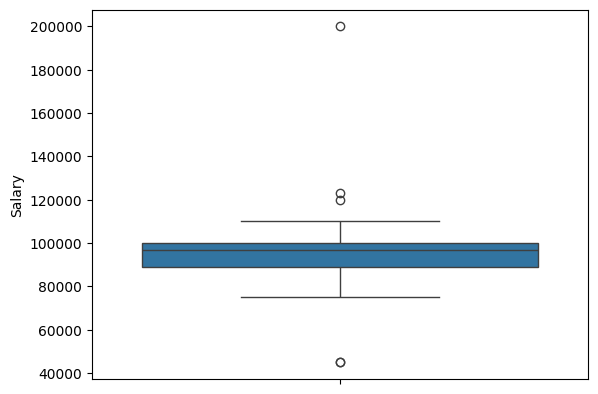

In [ ]:
# Salary data after filling null values
sb.boxplot(data.Salary)

In [ ]:
# saving data in new variable with outliers
data2 = data[(data.Salary>=lf) & (data.Salary <= uf)]
data2

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,97000.0
5,6,2451,Accountant,IT,34.0,100000.0
6,7,1111,Accountant,Accounts,30.0,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,97000.0
9,10,2156,Engineer,Production,45.0,89000.0
10,11,6543,Officer,Production,29.0,100000.0
12,13,2156,Engineer,Production,45.0,89000.0
13,14,1098,Officer,IT,25.0,100000.0


<Axes: ylabel='Salary'>

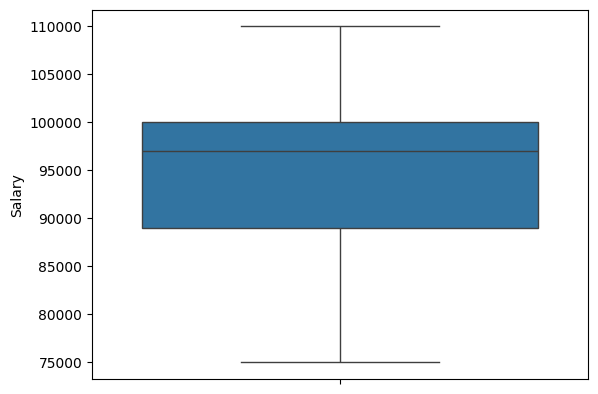

In [ ]:
# box plot for new dataset
sb.boxplot(data2.Salary)

In [ ]:
data.describe()

,Serial,Emp_ID,Age,Salary
count,18.000000,18.000000,18.000000,18.000000
mean,9.500000,1995.333333,34.055556,97000.000000
std,5.338539,1334.508369,9.483560,32927.728347
min,1.000000,1001.000000,23.000000,45000.000000
25%,5.250000,1108.000000,27.000000,89000.000000
50%,9.500000,1678.500000,30.000000,97000.000000
75%,13.750000,2156.000000,45.000000,100000.000000
max,18.000000,6543.000000,50.000000,200000.000000


In [ ]:
data2.describe()

,Serial,Emp_ID,Age,Salary
count,13.000000,13.000000,13.000000,13.000000
mean,10.076923,2026.923077,31.923077,93307.692308
std,4.821161,1499.005307,8.025600,9277.074030
min,2.000000,1001.000000,23.000000,75000.000000
25%,7.000000,1111.000000,25.000000,89000.000000
50%,10.000000,1234.000000,30.000000,97000.000000
75%,14.000000,2156.000000,34.000000,100000.000000
max,17.000000,6543.000000,45.000000,110000.000000


<Axes: xlabel='Designation', ylabel='Salary'>

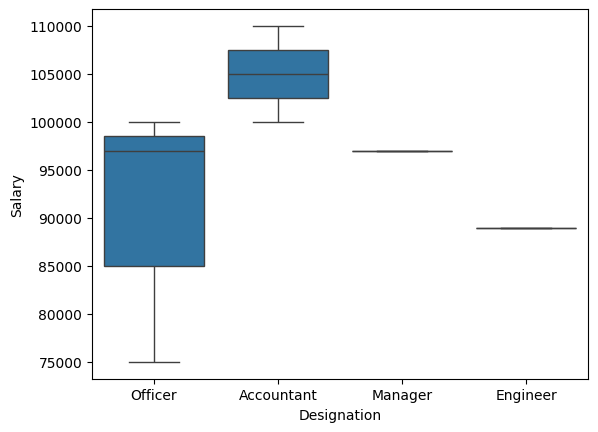

In [ ]:
# analyzing salary according to designation
sb.boxplot(data=data2, x="Designation", y="Salary")

<Axes: xlabel='Department', ylabel='Age'>

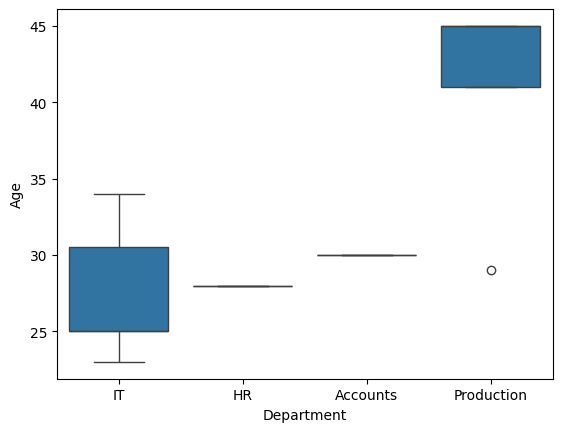

In [ ]:
# analyzing age according to department
sb.boxplot(data=data2, x="Department", y="Age")